# Preprocessing and Feature Engineering

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set_style('white')
%config InlineBackend.figure_format = 'retina'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('display.max_rows',78)
pd.set_option('display.max_columns',78)

In [3]:
hdb_prep_train = pd.read_csv('../datasets/cleaned_train.csv',low_memory=False)
hdb_prep_test = pd.read_csv('../datasets/cleaned_test.csv',low_memory=False)

In [4]:
hdb_prep_train.head(2)

id tranc_yearmonth             town flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA    4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN    5 ROOM   153      BISHAN ST 13   

  storey_range  floor_area_sqm flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0    Model A                 2006      680000.0   
1     07 TO 09           130.0   Improved                 1987      665000.0   

   tranc_year  tranc_month  mid_storey  lower  upper  mid   full_flat_type  \
0        2016            5          11     10     12   11   4 ROOM Model A   
1        2012            7           8      7      9    8  5 ROOM Improved   

                address  floor_area_sqft  price_per_sqft  hdb_age  \
0  3B, UPP BOON KENG RD           968.76      701.928238       15   
1     153, BISHAN ST 13          1399.32      475.230826       34   

   max_floor_lvl  year_completed  residential  commercial  market_hawker  \
0             25            2005            1           0              0   
1              9            1987            1           0              0   

   multistorey_carpark  precinct_pavilion  total_dwelling_units  1room_sold  \
0                    0                  0                   142           0   
1                    0                  0                   112           0   

   2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  multigen_sold  \
0           0           0          96          46          0              0   
1           0           0          56          56          0              0   

   studio_apartment_sold  1room_rental  2room_rental  3room_rental  \
0                      0             0             0             0   
1                      0             0             0             0   

   other_room_rental  postal  latitude   longitude planning_area  \
0                  0  382003  1.314299  103.872828       Kallang   
1                  0  570153  1.346086  103.855078        Bishan   

   mall_nearest_distance  mall_within_500m  mall_within_1km  mall_within_2km  \
0            1094.090418               0.0              0.0              7.0   
1             866.941448               0.0              1.0              3.0   

   hawker_nearest_distance  hawker_within_500m  hawker_within_1km  \
0               154.753357                 1.0                3.0   
1               640.151925                 0.0                1.0   

   hawker_within_2km  hawker_food_stalls  hawker_market_stalls  \
0               13.0                  84                    60   
1                7.0                  80                    77   

   mrt_nearest_distance mrt_name  bus_interchange  mrt_interchange  \
0            330.083069  Kallang                0                0   
1            903.659703   Bishan                1                1   

   mrt_latitude  mrt_longitude  bus_stop_nearest_distance bus_stop_name  \
0       1.31154     103.871731                  29.427395        Blk 3B   
1       1.35058     103.848305                  58.207761  BLK 151A MKT   

   bus_stop_latitude  bus_stop_longitude  pri_sch_nearest_distance  \
0           1.314433          103.872600               1138.633422   
1           1.345659          103.855381                415.607357   

                            pri_sch_name  vacancy  pri_sch_affiliation  \
0               Geylang Methodist School       78                    1   
1  Kuo Chuan Presbyterian Primary School       45                    1   

   pri_sch_latitude  pri_sch_longitude  sec_sch_nearest_dist  \
0          1.317659         103.882504           1138.633422   
1          1.349783         103.854529            447.894399   

                              sec_sch_name  cutoff_point  affiliation  \
0                 Geylang Methodist School           224            0   
1  Kuo Chuan Presbyterian Secondary School           232            0   

   sec_sch_latitude  sec_sch_

In [5]:
hdb_prep_train.shape

(150634, 78)

In [6]:
hdb_prep_test.shape

(16737, 77)

### Finding the correlation between features against resale price

In [7]:
# corr of features against resale price
hdb_prep_train.corr()['resale_price'].sort_values().round(2)

/var/folders/fp/6qfmbf013yzgt56bn7s48xbm0000gn/T/ipykernel_10116/1217793707.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hdb_prep_train.corr()['resale_price'].sort_values().round(2)


3room_sold                  -0.41
hdb_age                     -0.35
sec_sch_latitude            -0.22
latitude                    -0.22
bus_stop_latitude           -0.22
mrt_latitude                -0.21
pri_sch_latitude            -0.21
2room_sold                  -0.15
total_dwelling_units        -0.14
commercial                  -0.14
mrt_nearest_distance        -0.13
mall_nearest_distance       -0.09
3room_rental                -0.08
2room_rental                -0.08
1room_sold                  -0.04
1room_rental                -0.04
hawker_food_stalls          -0.03
tranc_year                  -0.02
vacancy                     -0.02
hawker_nearest_distance     -0.01
pri_sch_nearest_distance    -0.01
hawker_market_stalls        -0.01
multistorey_carpark         -0.01
tranc_month                 -0.01
market_hawker               -0.01
affiliation                 -0.00
precinct_pavilion            0.00
bus_interchange              0.00
hawker_within_500m           0.01
other_room_ren

In [8]:
corr_hdb=hdb_prep_train.corr()['resale_price'].sort_values().round(2)

/var/folders/fp/6qfmbf013yzgt56bn7s48xbm0000gn/T/ipykernel_10116/2067179950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_hdb=hdb_prep_train.corr()['resale_price'].sort_values().round(2)


<AxesSubplot: title={'center': 'Correlation of resale price against other features'}>

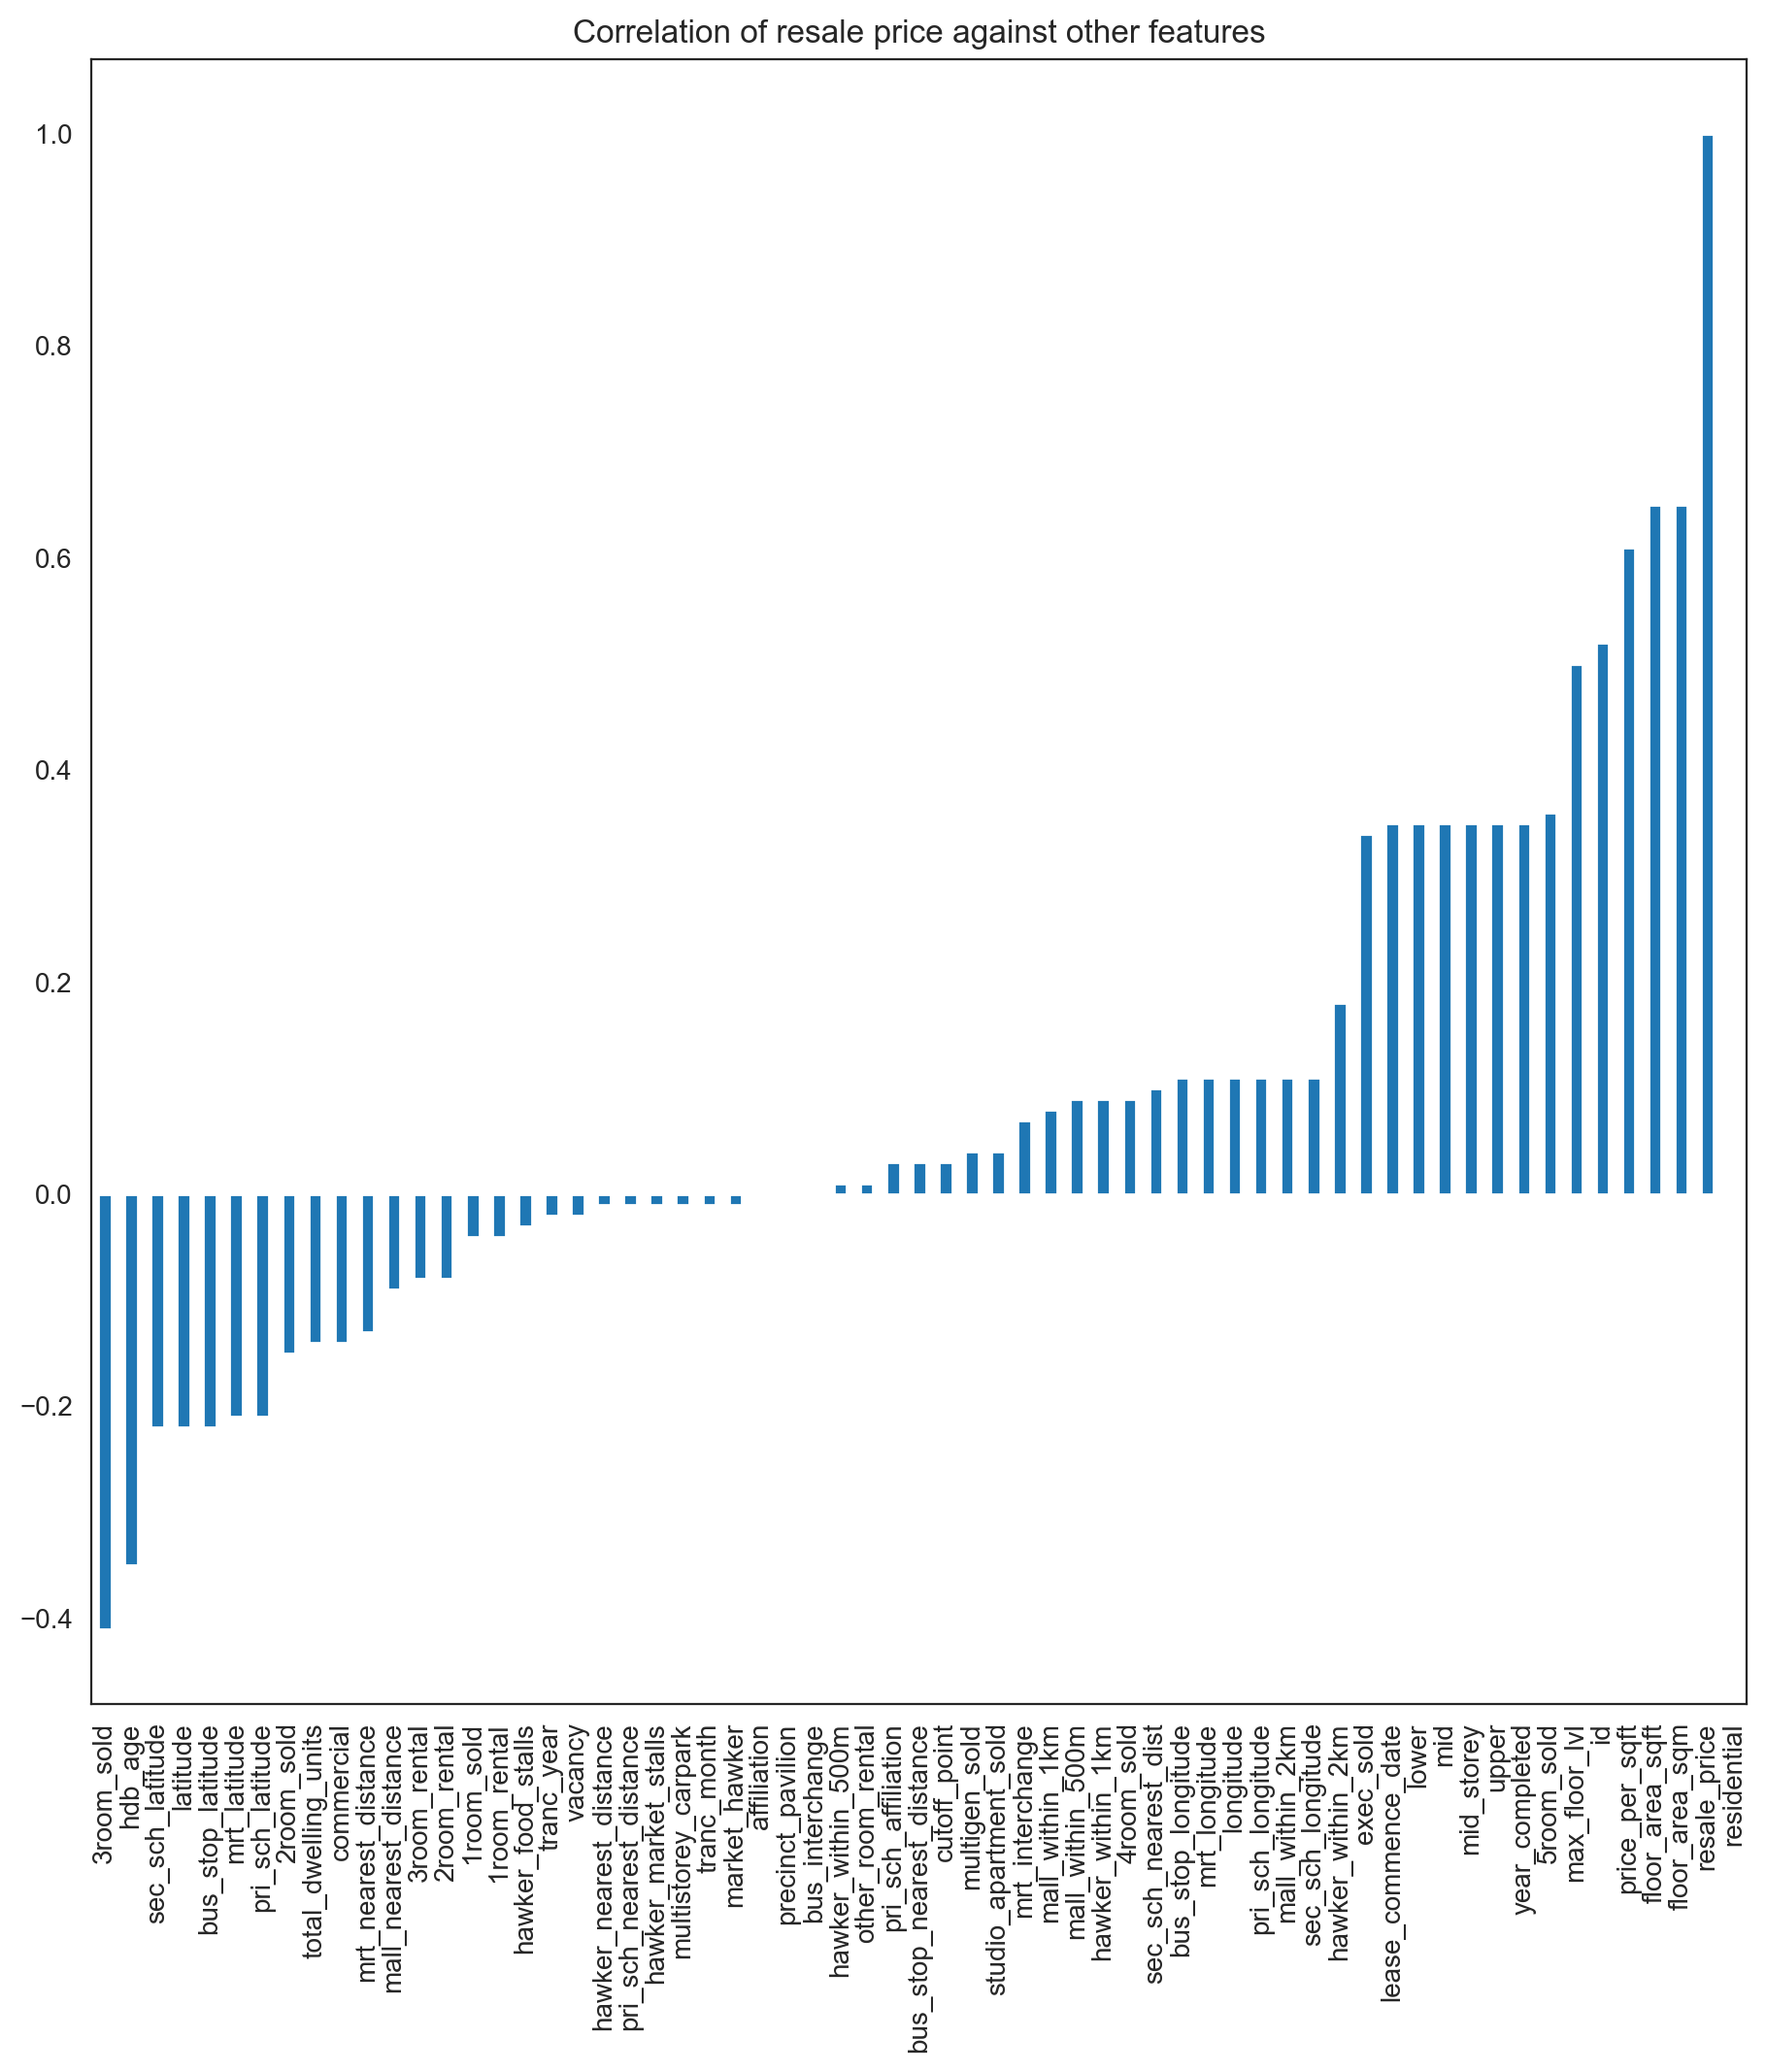

In [9]:
corr_hdb.plot(kind='bar',figsize=(11,11),title = 'Correlation of resale price against other features')

### features with high correlation:
floor_area_sqft,max_floor_lvl,5room_sold,exec_sold,3room_sold,hdb_age,sec_sch_latitude,bus_stop_latitude,mrt_latitude,pri_sch_latitude

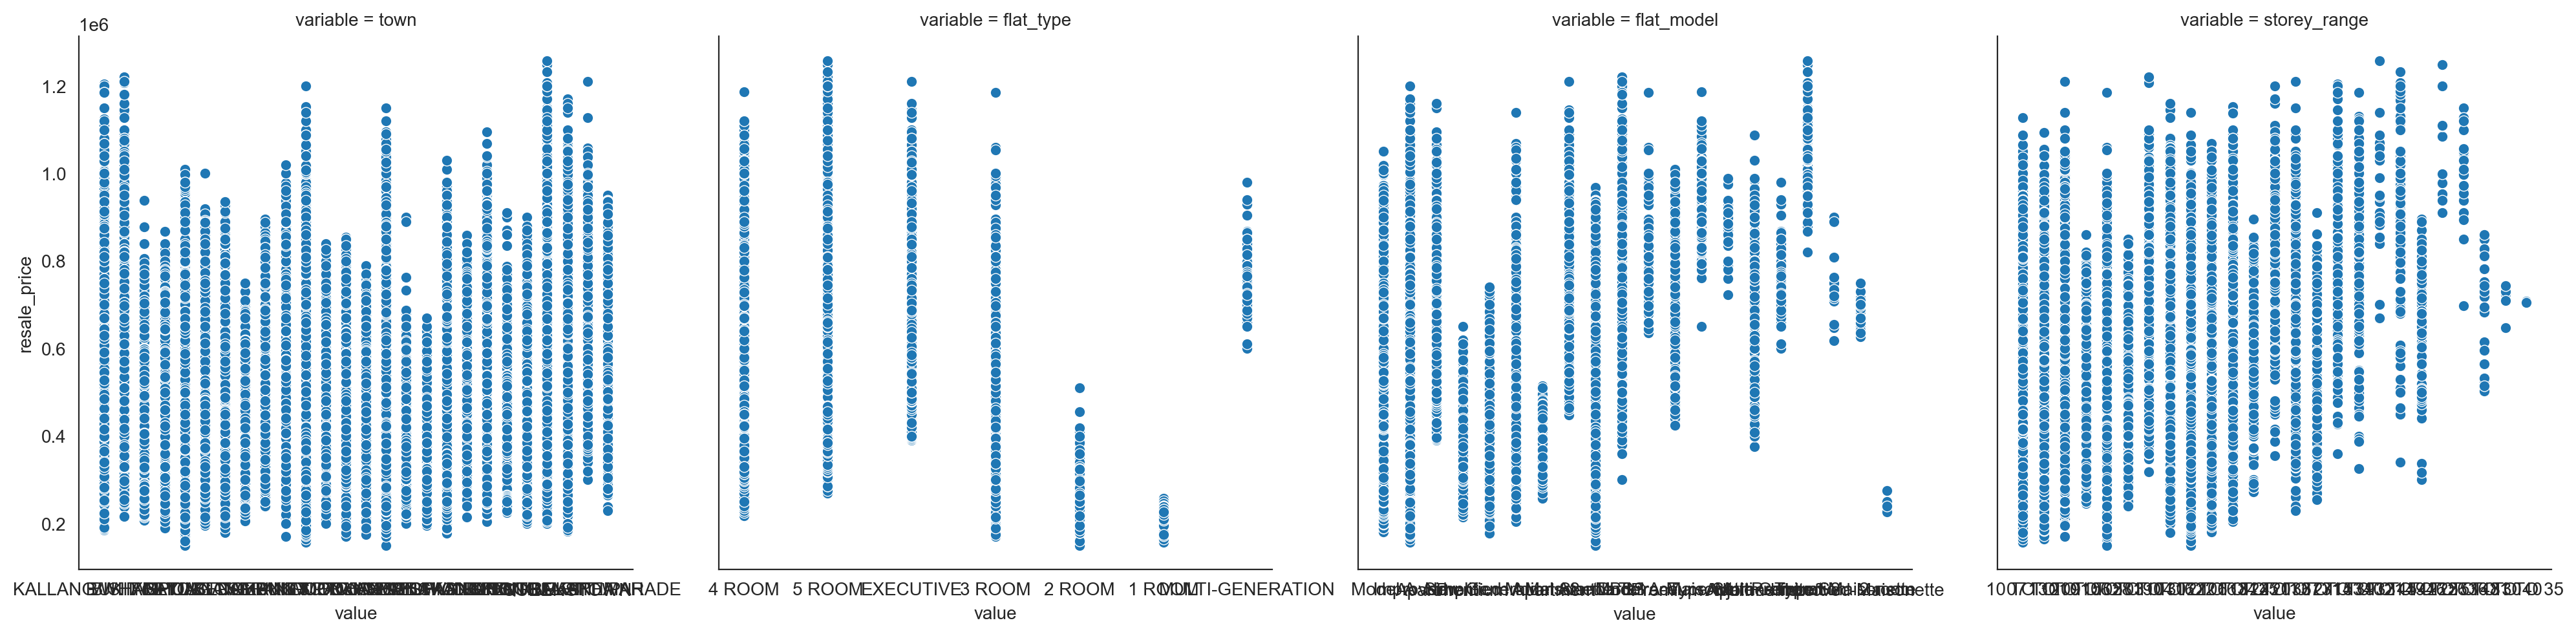

In [10]:
features = ['town','flat_type','flat_model','storey_range']
sns.relplot(
    x="value", y="resale_price", col="variable", data=hdb_prep_train.melt(id_vars="resale_price", value_vars=features), facet_kws=dict(sharex=False),
);

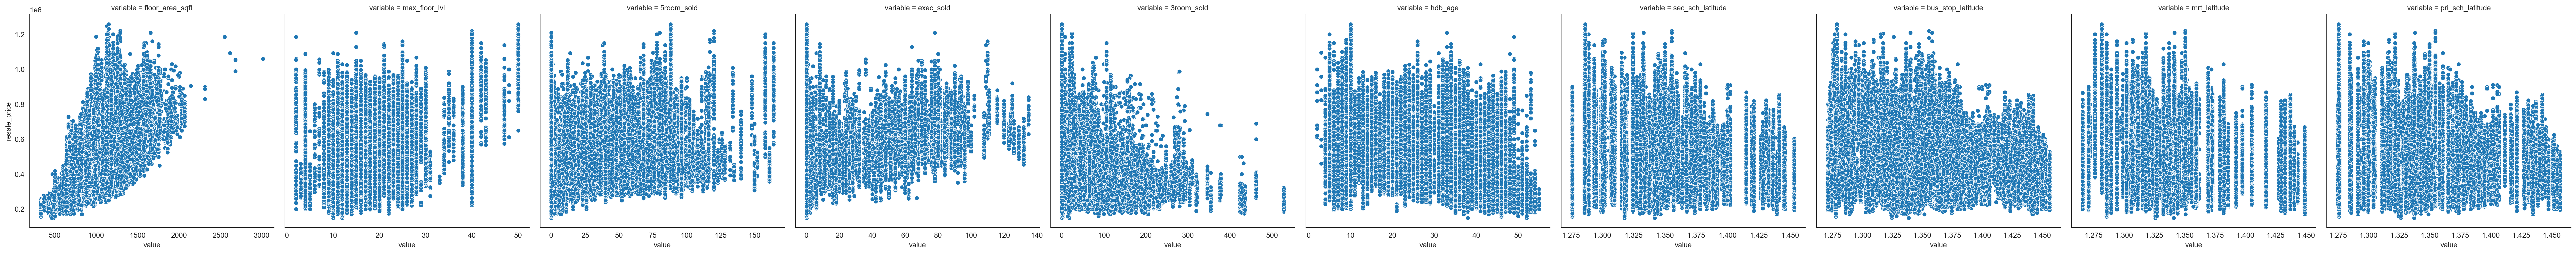

In [11]:

features = ['floor_area_sqft','max_floor_lvl','5room_sold','exec_sold','3room_sold','hdb_age','sec_sch_latitude','bus_stop_latitude','mrt_latitude','pri_sch_latitude']
sns.relplot(
    x="value", y="resale_price", col="variable", data=hdb_prep_train.melt(id_vars="resale_price", value_vars=features), facet_kws=dict(sharex=False),height=5, aspect=1)


In [12]:
numerical_features=hdb_prep_train.select_dtypes(exclude=['object']).columns
numerical_features

Index(['id', 'floor_area_sqm', 'lease_commence_date', 'resale_price',
       'tranc_year', 'tranc_month', 'mid_storey', 'lower', 'upper', 'mid',
       'floor_area_sqft', 'price_per_sqft', 'hdb_age', 'max_floor_lvl',
       'year_completed', 'residential', 'commercial', 'market_hawker',
       'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental',
       '2room_rental', '3room_rental', 'other_room_rental', 'latitude',
       'longitude', 'mall_nearest_distance', 'mall_within_500m',
       'mall_within_1km', 'mall_within_2km', 'hawker_nearest_distance',
       'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance', 'bus_stop_l

In [13]:
#find out selected features w multicollinearity 

X = hdb_prep_train[['floor_area_sqft', 'lease_commence_date', 'resale_price',
       'tranc_year', 'tranc_month', 
         'hdb_age', 'max_floor_lvl',
       'year_completed','market_hawker',
       'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units',
        'latitude',
       'longitude', 'mall_nearest_distance', 'mall_within_500m',
       'mall_within_1km', 'mall_within_2km', 'hawker_nearest_distance',
       'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance', 'bus_stop_latitude', 'bus_stop_longitude',
       'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affiliation',
       'pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_nearest_dist',
       'cutoff_point', 'affiliation', 'sec_sch_latitude', 'sec_sch_longitude']]

# # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# # calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
					for i in range(len(X.columns))]

In [14]:
vif=vif_data.round(1)
vif

feature        VIF
0             floor_area_sqft        3.8
1         lease_commence_date  4041588.4
2                resale_price        5.2
3                  tranc_year        1.1
4                 tranc_month        1.0
5                     hdb_age      783.5
6               max_floor_lvl        3.0
7              year_completed       50.8
8               market_hawker        1.0
9         multistorey_carpark        1.0
10          precinct_pavilion        1.0
11       total_dwelling_units        1.8
12                   latitude     3047.8
13                  longitude     8854.7
14      mall_nearest_distance        2.4
15           mall_within_500m        1.8
16            mall_within_1km        2.2
17            mall_within_2km        1.6
18    hawker_nearest_distance        2.5
19         hawker_within_500m        2.6
20          hawker_within_1km        5.2
21          hawker_within_2km        5.4
22         hawker_food_stalls        1.3
23       hawker_market_stalls        1.7
24       mrt_nearest_distance        1.3
25            bus_interchange        1.6
26            mrt_interchange        1.6
27               mrt_latitude       90.3
28              mrt_longitude      174.9
29  bus_stop_nearest_distance        1.0
30          bus_stop_latitude     2805.3
31         bus_stop_longitude     8108.8
32   pri_sch_nearest_distance        1.3
33                    vacancy        1.2
34        pri_sch_affiliation        1.2
35           pri_sch_latitude      240.3
36          pri_sch_longitude      746.9
37       sec_sch_nearest_dist        1.2
38               cutoff_point        1.4
39                affiliation        1.4
40           sec_sch_latitude      142.5
41          sec_sch_longitude      459.0

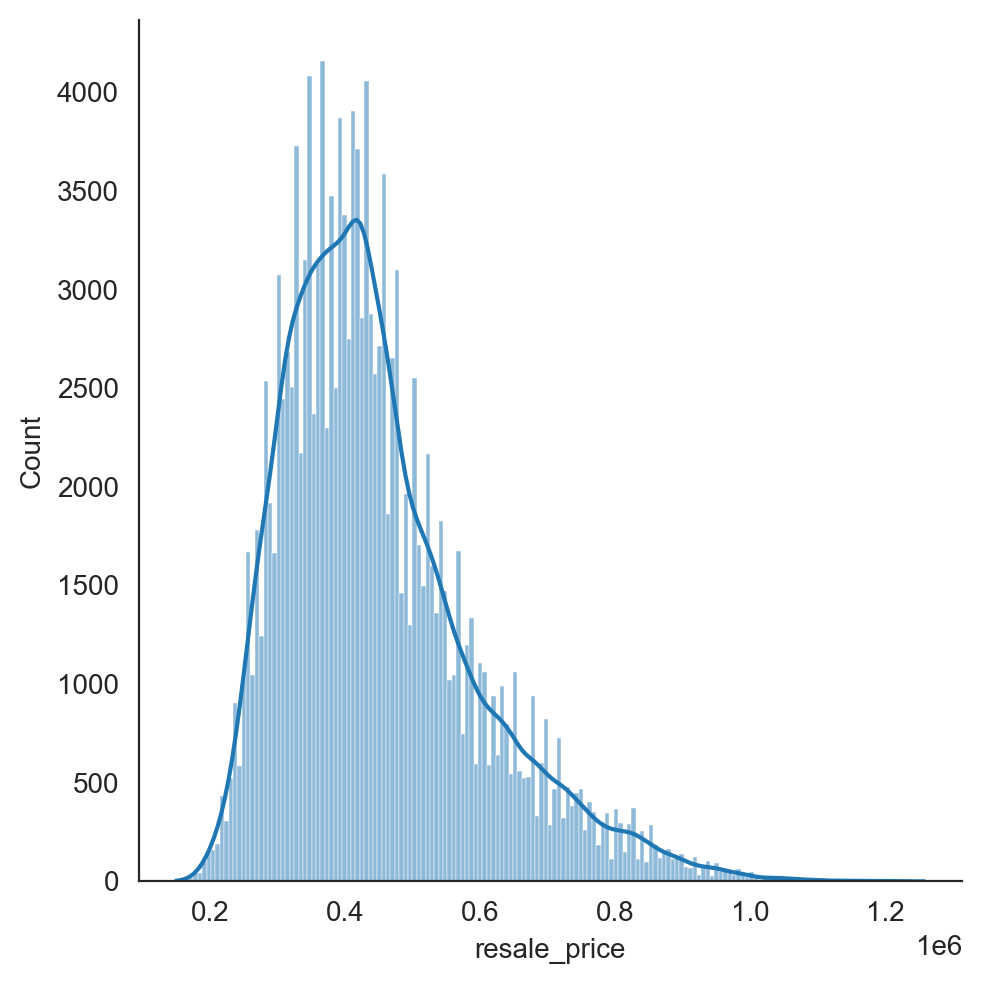

In [15]:
#show distribution of resale price
sns.displot(x=hdb_prep_train['resale_price'],kde=True)

/var/folders/fp/6qfmbf013yzgt56bn7s48xbm0000gn/T/ipykernel_10116/2369498244.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hdb_prep_train['resale_price_log']);


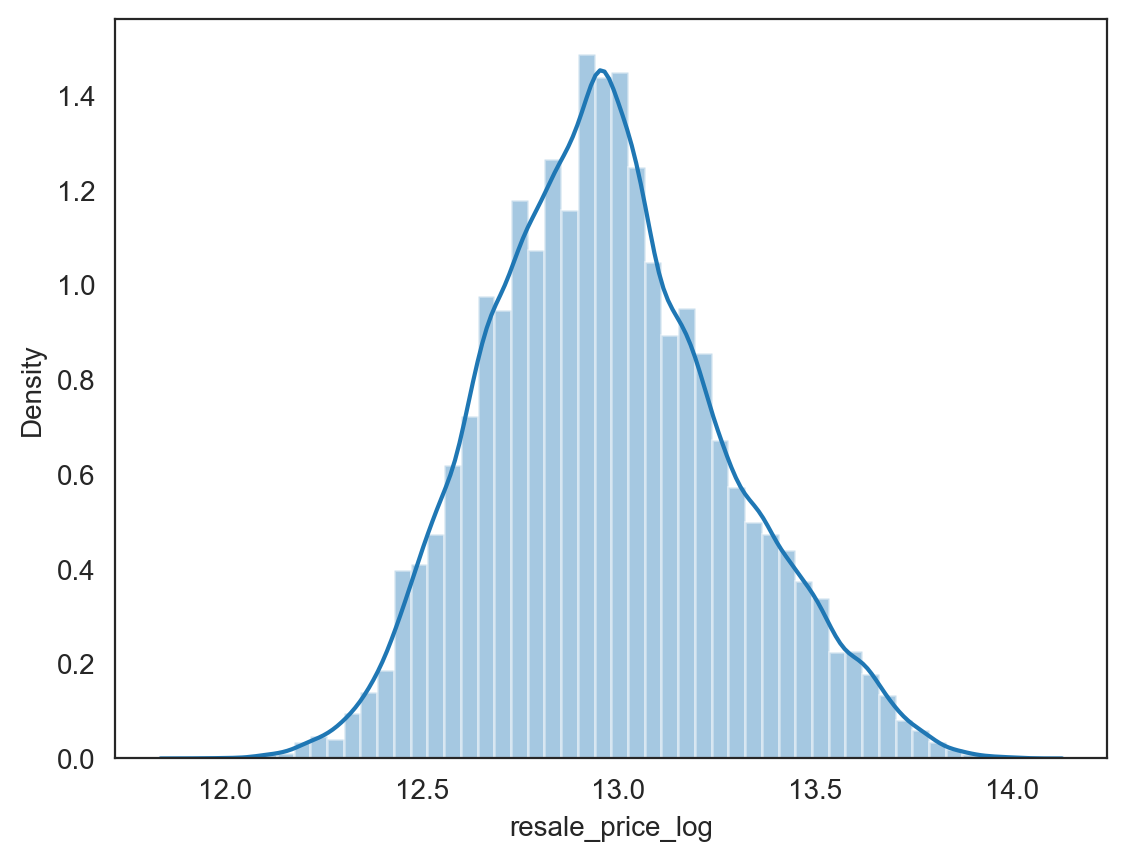

In [16]:
#log transform the resale price for a normal distribution

hdb_prep_train['resale_price_log'] = np.log(hdb_prep_train['resale_price'])

sns.distplot(hdb_prep_train['resale_price_log']);

/var/folders/fp/6qfmbf013yzgt56bn7s48xbm0000gn/T/ipykernel_10116/1934727513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=hdb_prep_train.corr()


<AxesSubplot: >

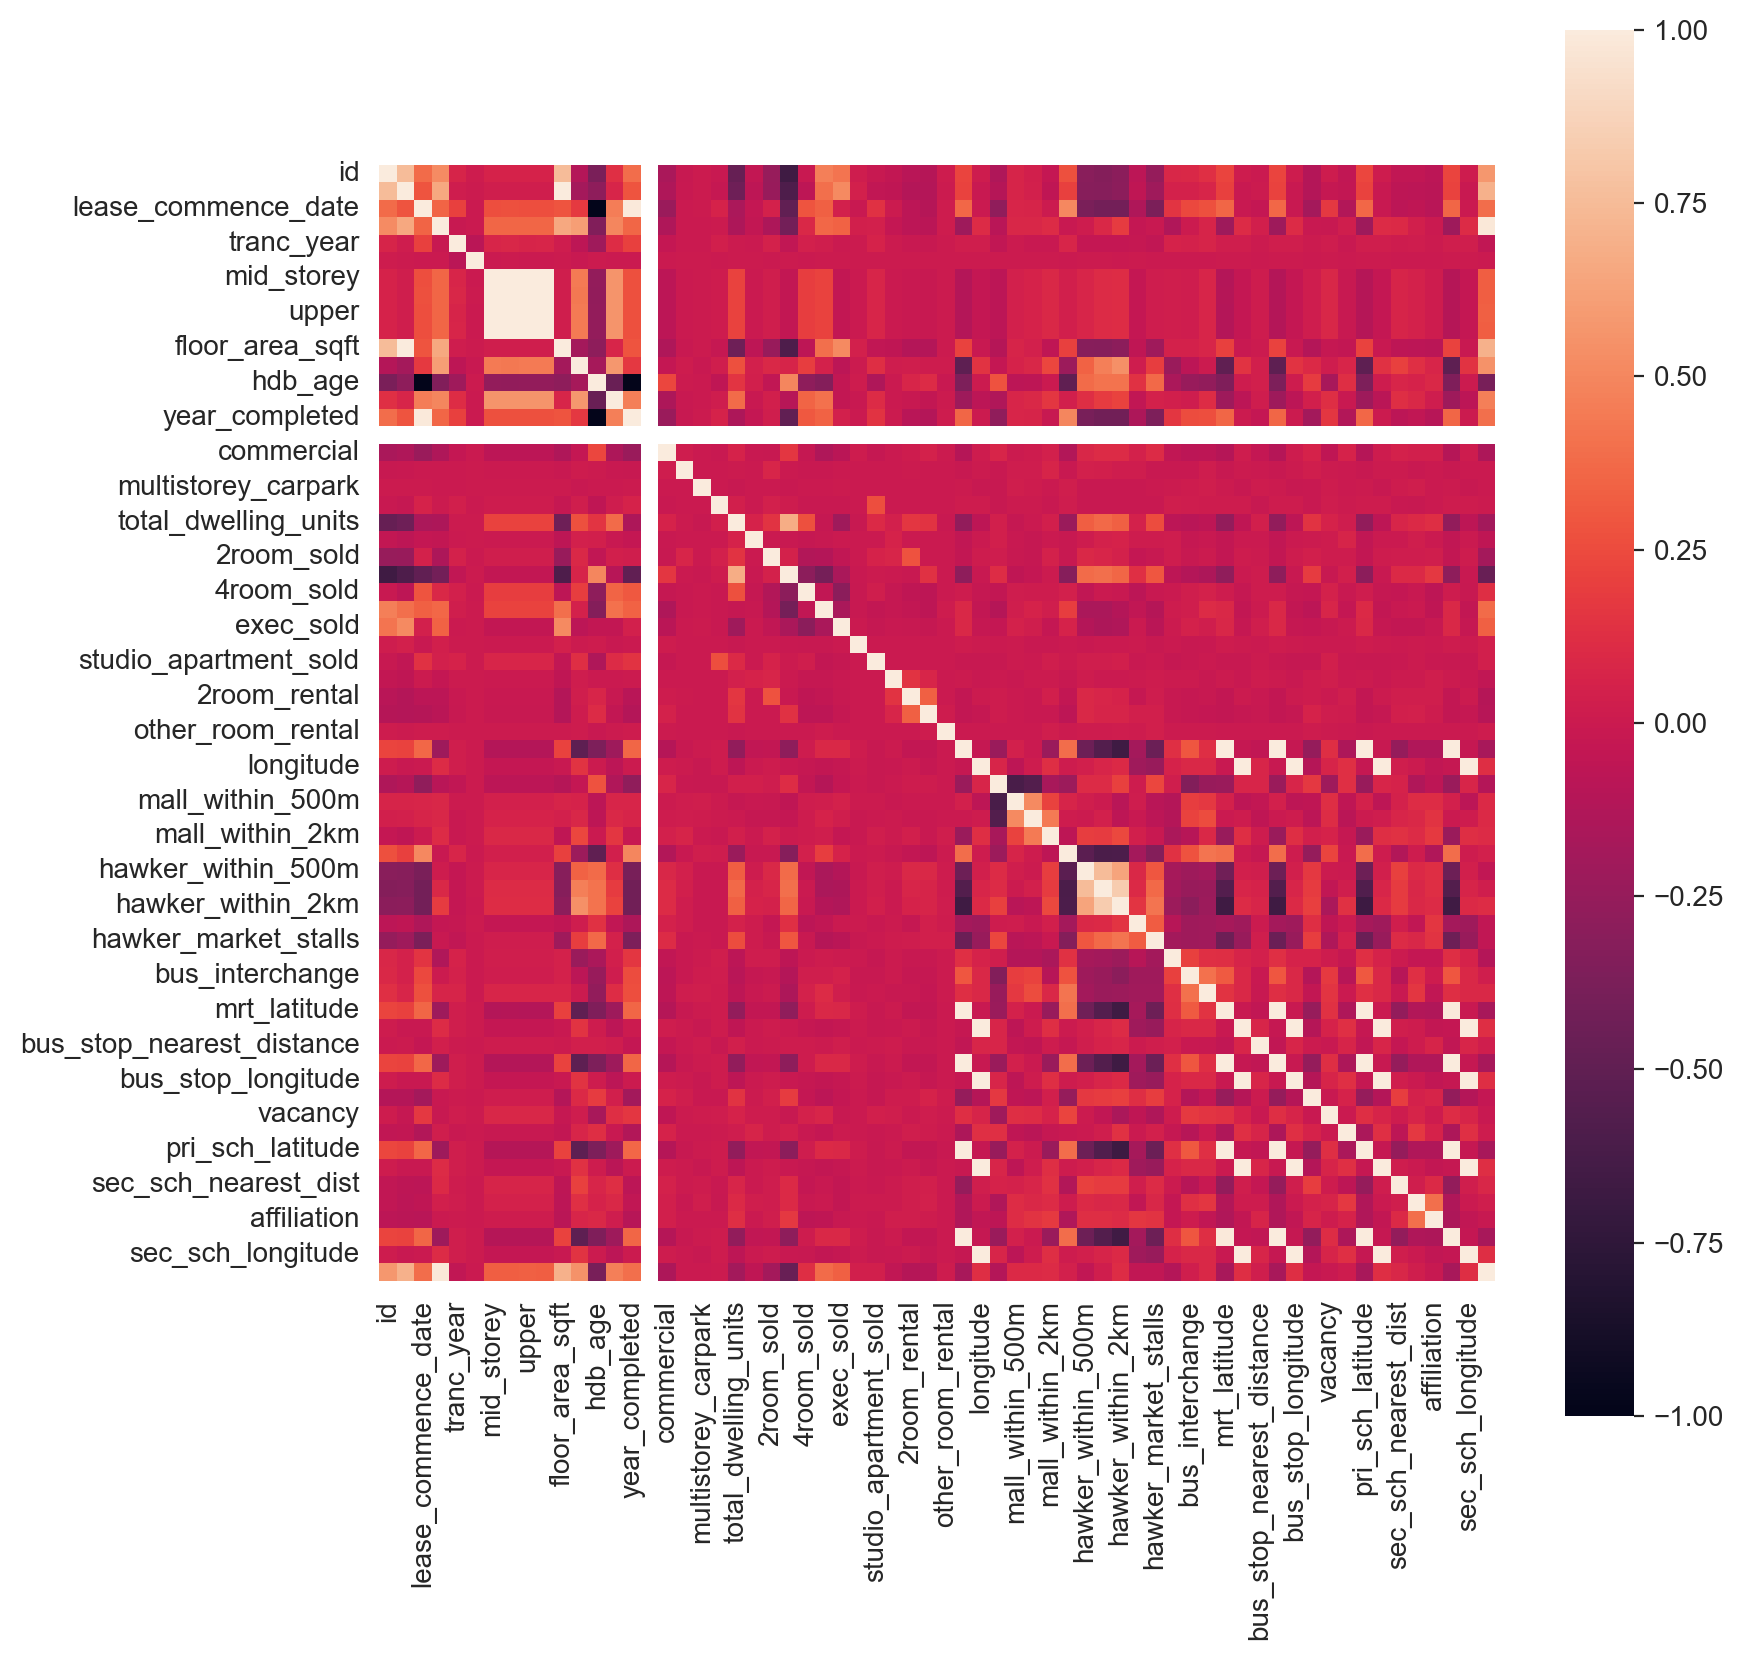

In [17]:
corr=hdb_prep_train.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(corr,vmax=1,square=True)

### Selecting features

In [18]:
numerical_features=hdb_prep_train.select_dtypes(exclude=['object']).columns
numerical_features

Index(['id', 'floor_area_sqm', 'lease_commence_date', 'resale_price',
       'tranc_year', 'tranc_month', 'mid_storey', 'lower', 'upper', 'mid',
       'floor_area_sqft', 'price_per_sqft', 'hdb_age', 'max_floor_lvl',
       'year_completed', 'residential', 'commercial', 'market_hawker',
       'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental',
       '2room_rental', '3room_rental', 'other_room_rental', 'latitude',
       'longitude', 'mall_nearest_distance', 'mall_within_500m',
       'mall_within_1km', 'mall_within_2km', 'hawker_nearest_distance',
       'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'bus_interchange', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_stop_nearest_distance', 'bus_stop_l

In [19]:
cat_features=hdb_prep_train.select_dtypes(include=['object']).columns
cat_features

Index(['tranc_yearmonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'flat_model', 'full_flat_type', 'address', 'postal',
       'planning_area', 'mrt_name', 'bus_stop_name', 'pri_sch_name',
       'sec_sch_name'],
      dtype='object')

### select features for ML

In [20]:
### features with high correlation:
#floor_area_sqft,max_floor_lvl,5room_sold,exec_sold,3room_sold,hdb_age,sec_sch_latitude,bus_stop_latitude,mrt_latitude,pri_sch_latitude

In [21]:
train_numerical_features=hdb_prep_train[['resale_price','id','floor_area_sqft','hdb_age','mall_nearest_distance','hawker_nearest_distance',
                            'mrt_nearest_distance','bus_stop_nearest_distance','pri_sch_nearest_distance',
                            'sec_sch_nearest_dist','max_floor_lvl']]

In [22]:
train_numerical_features.shape

(150634, 11)

In [23]:
test_numerical_features=hdb_prep_test[['id','floor_area_sqft','hdb_age','mall_nearest_distance','hawker_nearest_distance',
                            'mrt_nearest_distance','bus_stop_nearest_distance','pri_sch_nearest_distance',
                            'sec_sch_nearest_dist','max_floor_lvl']]

In [24]:
test_numerical_features.shape

(16737, 10)

In [25]:
train_cat_features=hdb_prep_train[['town','flat_type','storey_range']]

In [26]:
test_cat_features=hdb_prep_test[['town','flat_type','storey_range']]

In [27]:
hdb_merged_train=train_numerical_features.merge(train_cat_features,left_index=True,right_index=True)

In [28]:
hdb_merged_train.shape

(150634, 14)

In [29]:
hdb_merged_test=test_numerical_features.merge(test_cat_features,left_index=True,right_index=True)

In [30]:
hdb_merged_test.shape

(16737, 13)

In [31]:
#features of ML
hdb_merged_train.head(2)

resale_price      id  floor_area_sqft  hdb_age  mall_nearest_distance  \
0      680000.0   88471           968.76       15            1094.090418   
1      665000.0  122598          1399.32       34             866.941448   

   hawker_nearest_distance  mrt_nearest_distance  bus_stop_nearest_distance  \
0               154.753357            330.083069                  29.427395   
1               640.151925            903.659703                  58.207761   

   pri_sch_nearest_distance  sec_sch_nearest_dist  max_floor_lvl  \
0               1138.633422           1138.633422             25   
1                415.607357            447.894399              9   

              town flat_type storey_range  
0  KALLANG/WHAMPOA    4 ROOM     10 TO 12  
1           BISHAN    5 ROOM     07 TO 09

In [32]:
hdb_merged_test.head(2)

id  floor_area_sqft  hdb_age  mall_nearest_distance  \
0  114982          904.176       34             877.431572   
1   95653         1205.568       13             534.037705   

   hawker_nearest_distance  mrt_nearest_distance  bus_stop_nearest_distance  \
0               687.576779            686.660434                  75.683952   
1              2122.346226            169.478175                  88.993058   

   pri_sch_nearest_distance  sec_sch_nearest_dist  max_floor_lvl         town  \
0                426.467910            156.322353             12       YISHUN   
1                439.756851            739.371688             14  JURONG WEST   

  flat_type storey_range  
0    4 ROOM     07 TO 09  
1    5 ROOM     04 TO 06

In [33]:
hdb_merged_ohe_train=pd.get_dummies(hdb_merged_train,columns=['town','flat_type','storey_range'],drop_first=True)

In [34]:
hdb_merged_ohe_train.shape

(150634, 66)

In [35]:
hdb_merged_ohe_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 66 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   resale_price                150634 non-null  float64
 1   id                          150634 non-null  int64  
 2   floor_area_sqft             150634 non-null  float64
 3   hdb_age                     150634 non-null  int64  
 4   mall_nearest_distance       150634 non-null  float64
 5   hawker_nearest_distance     150634 non-null  float64
 6   mrt_nearest_distance        150634 non-null  float64
 7   bus_stop_nearest_distance   150634 non-null  float64
 8   pri_sch_nearest_distance    150634 non-null  float64
 9   sec_sch_nearest_dist        150634 non-null  float64
 10  max_floor_lvl               150634 non-null  int64  
 11  town_BEDOK                  150634 non-null  uint8  
 12  town_BISHAN                 150634 non-null  uint8  
 13  town_BUKIT BAT

In [36]:
hdb_merged_ohe_test=pd.get_dummies(hdb_merged_test,columns=['town','flat_type','storey_range'],drop_first=True)

In [37]:
hdb_merged_ohe_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          16737 non-null  int64  
 1   floor_area_sqft             16737 non-null  float64
 2   hdb_age                     16737 non-null  int64  
 3   mall_nearest_distance       16737 non-null  float64
 4   hawker_nearest_distance     16737 non-null  float64
 5   mrt_nearest_distance        16737 non-null  float64
 6   bus_stop_nearest_distance   16737 non-null  float64
 7   pri_sch_nearest_distance    16737 non-null  float64
 8   sec_sch_nearest_dist        16737 non-null  float64
 9   max_floor_lvl               16737 non-null  int64  
 10  town_BEDOK                  16737 non-null  uint8  
 11  town_BISHAN                 16737 non-null  uint8  
 12  town_BUKIT BATOK            16737 non-null  uint8  
 13  town_BUKIT MERAH            167

In [38]:
hdb_merged_ohe_test.shape

(16737, 63)

In [39]:
# Find the columns that are in hdb_merged_ohe_train but not in hdb_merged_ohe_test
cols_in_df1_not_in_df2 = set(hdb_merged_ohe_train.columns) - set(hdb_merged_ohe_test.columns)
cols_in_df1_not_in_df2

{'resale_price', 'storey_range_31 TO 35', 'storey_range_36 TO 40'}

In [40]:
hdb_merged_ohe_train = hdb_merged_ohe_train.drop(['storey_range_31 TO 35','storey_range_36 TO 40'],axis='columns')

In [41]:
hdb_merged_ohe_train.shape

(150634, 64)

In [42]:
hdb_merged_ohe_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 64 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   resale_price                150634 non-null  float64
 1   id                          150634 non-null  int64  
 2   floor_area_sqft             150634 non-null  float64
 3   hdb_age                     150634 non-null  int64  
 4   mall_nearest_distance       150634 non-null  float64
 5   hawker_nearest_distance     150634 non-null  float64
 6   mrt_nearest_distance        150634 non-null  float64
 7   bus_stop_nearest_distance   150634 non-null  float64
 8   pri_sch_nearest_distance    150634 non-null  float64
 9   sec_sch_nearest_dist        150634 non-null  float64
 10  max_floor_lvl               150634 non-null  int64  
 11  town_BEDOK                  150634 non-null  uint8  
 12  town_BISHAN                 150634 non-null  uint8  
 13  town_BUKIT BAT

In [43]:
hdb_merged_ohe_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          16737 non-null  int64  
 1   floor_area_sqft             16737 non-null  float64
 2   hdb_age                     16737 non-null  int64  
 3   mall_nearest_distance       16737 non-null  float64
 4   hawker_nearest_distance     16737 non-null  float64
 5   mrt_nearest_distance        16737 non-null  float64
 6   bus_stop_nearest_distance   16737 non-null  float64
 7   pri_sch_nearest_distance    16737 non-null  float64
 8   sec_sch_nearest_dist        16737 non-null  float64
 9   max_floor_lvl               16737 non-null  int64  
 10  town_BEDOK                  16737 non-null  uint8  
 11  town_BISHAN                 16737 non-null  uint8  
 12  town_BUKIT BATOK            16737 non-null  uint8  
 13  town_BUKIT MERAH            167

In [44]:
hdb_merged_ohe_train.isnull().sum()

resale_price                  0
id                            0
floor_area_sqft               0
hdb_age                       0
mall_nearest_distance         0
hawker_nearest_distance       0
mrt_nearest_distance          0
bus_stop_nearest_distance     0
pri_sch_nearest_distance      0
sec_sch_nearest_dist          0
max_floor_lvl                 0
town_BEDOK                    0
town_BISHAN                   0
town_BUKIT BATOK              0
town_BUKIT MERAH              0
town_BUKIT PANJANG            0
town_BUKIT TIMAH              0
town_CENTRAL AREA             0
town_CHOA CHU KANG            0
town_CLEMENTI                 0
town_GEYLANG                  0
town_HOUGANG                  0
town_JURONG EAST              0
town_JURONG WEST              0
town_KALLANG/WHAMPOA          0
town_MARINE PARADE            0
town_PASIR RIS                0
town_PUNGGOL                  0
town_QUEENSTOWN               0
town_SEMBAWANG                0
town_SENGKANG                 0
town_SER

In [45]:
hdb_merged_ohe_test.isnull().sum()

id                            0
floor_area_sqft               0
hdb_age                       0
mall_nearest_distance         0
hawker_nearest_distance       0
mrt_nearest_distance          0
bus_stop_nearest_distance     0
pri_sch_nearest_distance      0
sec_sch_nearest_dist          0
max_floor_lvl                 0
town_BEDOK                    0
town_BISHAN                   0
town_BUKIT BATOK              0
town_BUKIT MERAH              0
town_BUKIT PANJANG            0
town_BUKIT TIMAH              0
town_CENTRAL AREA             0
town_CHOA CHU KANG            0
town_CLEMENTI                 0
town_GEYLANG                  0
town_HOUGANG                  0
town_JURONG EAST              0
town_JURONG WEST              0
town_KALLANG/WHAMPOA          0
town_MARINE PARADE            0
town_PASIR RIS                0
town_PUNGGOL                  0
town_QUEENSTOWN               0
town_SEMBAWANG                0
town_SENGKANG                 0
town_SERANGOON                0
town_TAM

In [46]:
hdb_merged_ohe_train.describe()

resale_price             id  floor_area_sqft        hdb_age  \
count  1.506340e+05  150634.000000    150634.000000  150634.000000   
mean   4.491615e+05   93047.887496      1046.235290      28.551536   
std    1.433076e+05   53679.906247       262.674321      12.138829   
min    1.500000e+05       1.000000       333.684000       2.000000   
25%    3.470000e+05   46469.250000       807.300000      20.000000   
50%    4.200000e+05   93077.500000      1022.580000      29.000000   
75%    5.200000e+05  139574.750000      1205.568000      37.000000   
max    1.258000e+06  185966.000000      3013.920000      55.000000   

       mall_nearest_distance  hawker_nearest_distance  mrt_nearest_distance  \
count          150634.000000            150634.000000         150634.000000   
mean              660.584245              1173.700148            765.007872   
std               370.992108              1076.701337            429.366039   
min                 0.000000                 1.873295             21.971410   
25%               387.727774               372.132398            458.266301   
50%               600.167348               778.966980            682.621343   
75%               866.941448              1678.949229            975.734180   
max              3496.402910              4907.036414           3544.504228   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
count              150634.000000             150634.000000   
mean                  115.258966                395.172974   
std                    55.572855                234.760931   
min                     9.001285                 45.668324   
25%                    75.032491                227.083163   
50%                   107.765999                348.876691   
75%                   146.652409                502.179385   
max                   443.964584               3305.841039   

       sec_sch_nearest_dist  max_floor_lvl     town_BEDOK    town_BISHAN  \
count         150634.000000  150634.000000  150634.000000  150634.000000   
mean             508.533220      15.139816       0.060053       0.019059   
std              309.066265       6.232492       0.237586       0.136734   
min               38.913475       2.000000       0.000000       0.000000   
25%              290.285883      12.000000       0.000000       0.000000   
50%              447.377670      13.000000       0.000000       0.000000   
75%              644.284099      16.000000       0.000000       0.000000   
max             3638.977233      50.000000       1.000000       1.000000   

       town_BUKIT BATOK  town_BUKIT MERAH  town_BUKIT PANJANG  \
count     150634.000000     150634.000000       150634.000000   
mean           0.037329          0.038862            0.037747   
std            0.189567          0.193268            0.190585   
min            0.000000          0.000000            0.000000   
25%            0.000000          0.000000            0.000000   
50%            0.000000          0.000000            0.000000   
75%            0.000000          0.000000            0.000000   
max            1.000000          1.000000            1.000000   

       town_BUKIT TIMAH  town_CENTRAL AREA  town_CHOA CHU KANG  town_CLEMENTI  \
count     150634.000000      150634.000000       150634.000000  150634.000000   
mean           0.002450           0.008292            0.042109       0.024118   
std            0.049433           0.090680            0.200838       0.153416   
min            0.000000           0.000000            0.000000       0.000000   
25%            0.000000           0.000000            0.000000       0.000000   
50%            0.000000           0.000000            0.000000       0.000000   
75%            0.000000           0.000000            0.000000       0.000000   
max            1.000000           1.000000            1.000000       1.000000   

        town_GEYLANG   town_HOUGANG  town_JURONG EAST  town_JURONG WEST  \
count  150634.000000  150634.

In [47]:
hdb_merged_ohe_test.describe()

id  floor_area_sqft       hdb_age  mall_nearest_distance  \
count   16737.000000     16737.000000  16737.000000           16737.000000   
mean    92253.767342      1043.288014     28.658780             658.179728   
std     53302.038393       263.155328     12.170893             369.327830   
min         7.000000       333.684000      2.000000               0.000000   
25%     46550.000000       796.536000     20.000000             386.526340   
50%     91830.000000      1022.580000     30.000000             597.577665   
75%    137789.000000      1205.568000     37.000000             866.776407   
max    185967.000000      2863.224000     55.000000            3496.402910   

       hawker_nearest_distance  mrt_nearest_distance  \
count             16737.000000          16737.000000   
mean               1170.734627            766.780730   
std                1078.996296            430.837778   
min                   8.681508             21.971410   
25%                 367.042734            458.361406   
50%                 771.501451            685.933955   
75%                1677.415462            980.990779   
max                4816.062542           3544.504228   

       bus_stop_nearest_distance  pri_sch_nearest_distance  \
count               16737.000000              16737.000000   
mean                  114.754425                395.119993   
std                    55.719310                234.336770   
min                     9.001285                 45.668324   
25%                    74.220098                227.739700   
50%                   106.753391                347.207319   
75%                   145.936388                501.045376   
max                   443.964584               3305.841039   

       sec_sch_nearest_dist  max_floor_lvl    town_BEDOK   town_BISHAN  \
count          16737.000000   16737.000000  16737.000000  16737.000000   
mean             510.960150      15.130011      0.060345      0.019717   
std              312.758000       6.126188      0.238133      0.139029   
min               45.429070       2.000000      0.000000      0.000000   
25%              292.017769      12.000000      0.000000      0.000000   
50%              448.018148      13.000000      0.000000      0.000000   
75%              644.284099      16.000000      0.000000      0.000000   
max             3636.953504      50.000000      1.000000      1.000000   

       town_BUKIT BATOK  town_BUKIT MERAH  town_BUKIT PANJANG  \
count      16737.000000      16737.000000        16737.000000   
mean           0.037880          0.039135            0.038597   
std            0.190912          0.193922            0.192639   
min            0.000000          0.000000            0.000000   
25%            0.000000          0.000000            0.000000   
50%            0.000000          0.000000            0.000000   
75%            0.000000          0.000000            0.000000   
max            1.000000          1.000000            1.000000   

       town_BUKIT TIMAH  town_CENTRAL AREA  town_CHOA CHU KANG  town_CLEMENTI  \
count      16737.000000       16737.000000        16737.000000   16737.000000   
mean           0.002450           0.008066            0.042660       0.023242   
std            0.049435           0.089450            0.202095       0.150675   
min            0.000000           0.000000            0.000000       0.000000   
25%            0.000000           0.000000            0.000000       0.000000   
50%            0.000000           0.000000            0.000000       0.000000   
75%            0.000000           0.000000            0.000000       0.000000   
max            1.000000           1.000000            1.000000       1.000000   

       town_GEYLANG  town_HOUGANG  town_JURONG EAST  town_JURONG WEST  \
count  16737.000000  16737.000000      16737.000000      16737.000000   
mean       0.025931      0.047918          0.020016          0.074446   
std        0.158933      0.213599          0.1400

In [48]:
#save hdb_merged_ohe train and test file for machine learning
hdb_merged_ohe_train.to_csv(path_or_buf='../datasets/cleaned_ml_train.csv',index=False, header = True)
hdb_merged_ohe_test.to_csv(path_or_buf='../datasets/cleaned_ml_test.csv',index=False, header = True)